In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import heapq as pq

In [3]:
def soda19bound():
    """ directly using CCMS10SODA theorem 3.1 (assume constant is 1) """
    N = 10**8
    coeff = 1
    epsilon = 1
    delta = 2**-40
    return coeff/epsilon * (math.log2(N) ** 1.5) * math.sqrt(math.log2(1/delta))
soda19bound()
np.log(10.**20)

46.051701859880914

In [6]:
def sum_of_lap(b, n):
    """ sum of n laplace random variables with 0 mean and scale b """
    return np.sum(np.random.laplace(0, b, n))

def delta_tail(b, d, n):
    """ with probablity 2^(-d), the total noise is > a (return value) """
    R = 10000
    h = []
    for i in range(2**d*R):
        v = np.absolute(sum_of_lap(b, n))
        if len(h) <= R:
            pq.heappush(h, v)
        else:
            if v > h[0]:
                pq.heapreplace(h, v)
    print(h[0])
    return h[0]

N = 10.**9 # suppose the database have 1 billion tuple
n = int(np.ceil(np.log(N)*2))
x = np.arange(1, 21)
y = [delta_tail(np.log(N), i, n) for i in x]

128.64371203268553
216.86920221541283
289.2891516276327
354.9740256182412
411.91695764646255
462.7092783849562
512.371051911858
557.0373577771716
599.6238672598266
641.1060520107715
680.5060781075846
718.2933902563893
753.933207590896
788.8604838340881
823.3424488540203
856.6454332045863
889.9172042977277
921.4527860006333
952.6615036804212
983.609042417687


Text(0.5, 1.0, '$|Y| > a$ with probability at most $\\delta$')

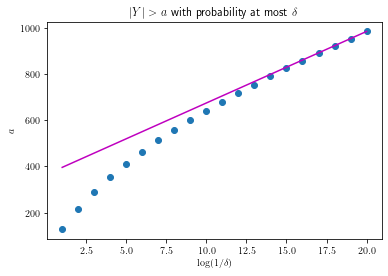

In [10]:
plt.scatter(x, y)
z = [y[18] + (y[19]-y[18])*(i-19)  for i in x]
plt.plot(x, z, 'm')
plt.xlabel(r'$\log(1/\delta)$')
plt.ylabel(r'$a$')
plt.title(r'$|Y| > a$ with probability at most $\delta$')

In [1]:
plt.savefig('simulation.pdf')

NameError: name 'plt' is not defined